**Brian Blaylock**  
**March 12, 2019**

# Read HRRR-GLM Lightning Hit Rates and False Alarm Ratios
## Hovemoller Diagrams

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
from matplotlib.path import Path

import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = [15,15]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.15
mpl.rcParams['figure.subplot.hspace'] = 0.2
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

SAVEDIR = '/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/HRRR_GOES/GLM_hit_rate/HOV/'
if not os.path.exists(SAVEDIR):
    os.makedirs(SAVEDIR)

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap
from BB_HRRR.HRRR_Pando import get_hrrr_latlon, get_hrrr_variable
from BB_GOES.get_GLM import get_GLM_file_nearesttime, accumulate_GLM_FAST

# Domain Areas
Area of each domain in square kilometers

In [2]:
Hlat, Hlon = get_hrrr_latlon(DICT=False)

PATH_points = {
    'HRRR':
        {'lon': np.concatenate([Hlon[0], Hlon[:,-1], Hlon[-1][::-1], Hlon[:,0][::-1]]),
         'lat': np.concatenate([Hlat[0], Hlat[:,-1], Hlat[-1][::-1], Hlat[:,0][::-1]])},
    'West':{
        'lon':[-120, -104, -104, -120, -120],
        'lat':[24.4, 24.4, 50.2, 50.2, 24.2]},
    'Central':{
        'lon':[-104, -88, -88, -104, -104],
        'lat':[24.4, 24.4, 50.2, 50.2, 24.2]},
    'East':{
        'lon':[-88, -72, -72, -88, -88],
        'lat':[24.4, 24.4, 50.2, 50.2, 24.2]},
    'Utah':{
        'lon':[-114.041664, -111.047526, -111.045645,  -109.051460, -109.048632, -114.051534, -114.041664],
        'lat':[41.993580, 42.002846, 40.998538, 40.998403, 36.998310, 37.000574, 41.993580]}
}

## Combine lat/lon as vertice pair as a tuple. i.e. (lon, lat).
PATH_verts = {}
for i in PATH_points.keys():
    PATH_verts[i] = np.array([(PATH_points[i]['lon'][j], PATH_points[i]['lat'][j]) for j in range(len(PATH_points[i]['lon']))])

## Generate Path objects from the vertices.
PATHS = {}
for i in PATH_verts.keys():
    PATHS[i] = Path(PATH_verts[i])

area_sqkm = {'HRRR':16811840.28,
             'West':4034896.81,
             'Central':4034896.81,
             'East':4034896.81,
             'Utah':219973.26}

---
---

# Hovmoller: Hit Rate and False Alarm

# Hit Flash Density

\begin{equation}
\frac{Total GLM Flashes * Hit Rate}{LTNG Area}
\end{equation}

Domain:  Central Month:  5


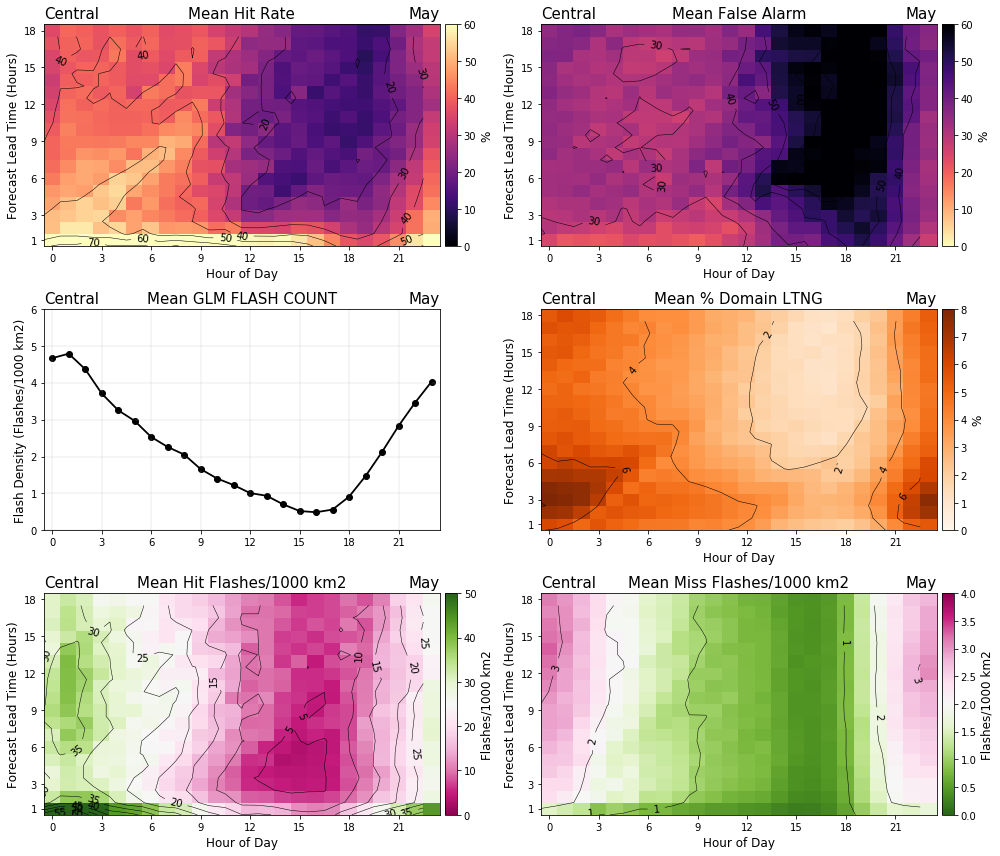

In [467]:
plots = ('Hit_Rate', 'False_Alarm', 'GLM_FLASH_COUNT', 'Total_Area_km2', 'Hit_Flash_Density', 'Miss_Flash_Density')

for month in range(5,6):
    #for D in PATHS.keys():
    for D in ['Central']:
        print('Domain: ', D, 'Month: ', month)
        
        # Get hovemollers for each the statistics field in the file
        stats = get_HRRR_GLM_stats_hov_by_month(D, month)
        
        # Generate figures
        fig, axes = plt.subplots(3, 2, figsize=(7*2,4*3))
        axes = axes.flatten()
        
        for i, (ax, name) in enumerate(zip(axes, plots)):
            plt.sca(ax)
            
            if name == 'Hit_Rate':
                hov = stats['Hit_Rate']*100 # Convert decimal to percentage
                units = '%'
                cmap = 'magma'
                vmax = 60
                clevels = range(0,100,10)
            elif name == 'False_Alarm':
                hov = stats['False_Alarm']*100 # Convert decimal to percentage
                units = '%'
                cmap = 'magma_r'
                vmax = 60
                clevels = range(0,100,10)
            elif name == 'Total_Area_km2':
                cmap = 'Oranges'
                hov = stats['Total_Area_km2']/area_sqkm[D]*100 # Convert decimal to percentage
                units = '%'
                name = '% Domain LTNG'
                vmax = 8
                clevels = range(0,100,2)
            elif name == 'GLM_FLASH_COUNT':
                hov = stats['GLM_FLASH_COUNT']/area_sqkm[D]*1000 # Convert flash count to flashes/1000km2
                units = 'Flashes/1000 km2'
                vmax = 6
                cmap = 'viridis'
                clevels = range(0,100)
            elif name == 'Hit_Flash_Density':
                hov = stats['GLM_FLASH_COUNT']*stats['Hit_Rate']/stats['Total_Area_km2']*1000 # Convert flash count to flashes/1000km2
                name = 'Hit Flashes/1000 km2'
                units = 'Flashes/1000 km2'
                vmax = 50
                cmap = 'PiYG'
                clevels = range(0,100, 5)
            elif name == 'Miss_Flash_Density':
                hov = stats['GLM_FLASH_COUNT']*(1-stats['Hit_Rate'])/(area_sqkm[D]-stats['Total_Area_km2'])*1000 # Convert flash count to flashes/1000km2
                name = 'Miss Flashes/1000 km2'
                units = 'Flashes/1000 km2'
                vmax = 4
                cmap = 'PiYG_r'
                clevels = range(0,100)
            
            if name == 'GLM_FLASH_COUNT':
                ax.scatter(range(24), hov[:,0], color='k')
                im2 = ax.plot(range(24), hov[:,0], c='k')
                divider2 = make_axes_locatable(ax)
                cax2 = divider2.append_axes("right", size="3%", pad=.07)
                cax2.remove()
                
                ax.set_title('%s' % D, loc='left')
                ax.set_title('Mean %s' % name.replace('_', ' '))
                ax.set_title('%s' % datetime(2018, month, 1).strftime('%b'), loc='right')
                ax.set_xticks(range(0,24,3))
                ax.set_xlim([-.5,23.5])
                ax.set_ylim([0, vmax])
                ax.set_ylabel('Flash Density (Flashes/1000 km2)')
                plt.grid()
                
            else:
                #plt.pcolormesh(range(25), range(1,20), np.transpose(hov), cmap=cmap, vmin=0, vmax=vmax)
                #plt.colorbar(label='%s' % (units))

                im1 = ax.pcolormesh(range(25), range(1,20), np.transpose(hov), cmap=cmap, vmin=0, vmax=vmax)
                divider = make_axes_locatable(ax)
                cax = divider.append_axes("right", size="3%", pad=.07)
                plt.colorbar(im1, cax=cax, label='%s' % (units))
                
                CS = ax.contour(range(24), range(1,19), np.transpose(hov), colors='k', levels=clevels, linewidths=.5)
                plt.clabel(CS, fmt='%1.0f')
               
                ax.set_xlabel('Hour of Day')
                ax.set_ylabel('Forecast Lead Time (Hours)')
                ax.set_yticks(np.array([1, 3, 6, 9, 12, 15, 18])+.5)
                ax.set_yticklabels([1, 3, 6, 9, 12, 15, 18])
                ax.set_xticks(np.arange(0.5,24,3))
                ax.set_xticklabels(range(0,24, 3))
                ax.set_xlim([0,24])
                ax.set_title('%s' % D, loc='left')
                ax.set_title('Mean %s' % name.replace('_', ' '))
                ax.set_title('%s' % datetime(2018, month, 1).strftime('%b'), loc='right')

        plt.tight_layout()
        #plt.savefig(SAVEDIR+'%s_m%02d' % (D, month))
        #plt.close()

In [416]:
test = get_HRRR_GLM_stats_hov_by_month('Central', 7)

In [417]:
test.keys()

dict_keys(['Hit_Rate', 'False_Alarm', 'GLM_FLASH_COUNT', 'Total_Area_km2'])

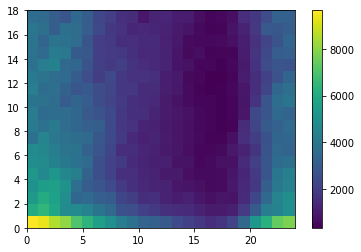

In [426]:
plt.pcolormesh(np.transpose(test['Hit_Rate']*test['GLM_FLASH_COUNT']))
plt.colorbar()

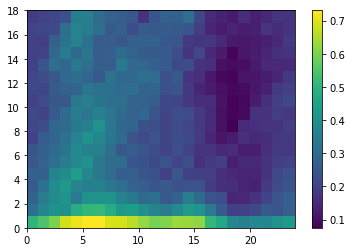

In [423]:
plt.pcolormesh(np.transpose(test['Hit_Rate']))
plt.colorbar()

In [443]:
stats = get_HRRR_GLM_stats_hov_by_month(D, month)

In [444]:
stats.keys()

dict_keys(['Hit_Rate', 'False_Alarm', 'GLM_FLASH_COUNT', 'Total_Area_km2'])

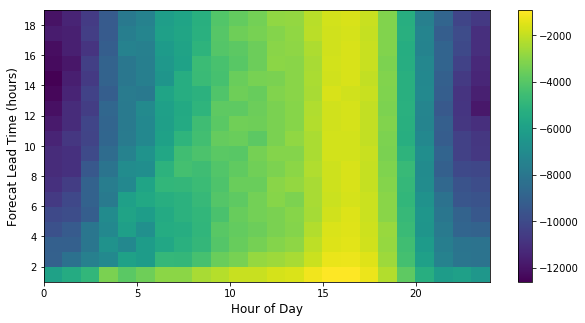

In [466]:
value = ((stats['GLM_FLASH_COUNT']*(stats['Hit_Rate']))-stats['GLM_FLASH_COUNT'])#/stats['GLM_FLASH_COUNT']

plt.figure(figsize=(10,5))
plt.pcolormesh(range(25), range(1,20), np.transpose(value))
plt.ylabel('Forecat Lead Time (hours)')
plt.xlabel('Hour of Day')
plt.colorbar()